In [3]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import scipy.stats as stats

import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
sns.set()

In [4]:
data_cleaned = pd.read_csv('F:\\New folder\\AI.csv')
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,Revenue_log
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,United Kingdom,2010,1,2,1,8,15.30,2.791165
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,United Kingdom,2010,1,2,1,8,22.00,3.135494
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,United Kingdom,2010,1,2,1,8,20.34,3.060583


In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to StockCode and Country in data_cleaned
data_cleaned['StockCode'] = label_encoder.fit_transform(data_cleaned['StockCode'])
data_cleaned['Country'] = label_encoder.fit_transform(data_cleaned['Country'])
data_cleaned['InvoiceNo'] = label_encoder.fit_transform(data_cleaned['InvoiceNo'])
data_cleaned['Description'] = label_encoder.fit_transform(data_cleaned['Description'])

In [6]:
data_RF = data_cleaned.drop(['Revenue_log','InvoiceDate'], axis = 1)
data_RF.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue
0,0,3210,3598,6,2.55,36,2010,1,2,1,8,15.30
1,0,2571,3606,6,3.39,36,2010,1,2,1,8,20.34
2,0,2786,814,8,2.75,36,2010,1,2,1,8,22.00
3,0,2735,1733,6,3.39,36,2010,1,2,1,8,20.34
4,0,2734,2665,6,3.39,36,2010,1,2,1,8,20.34


In [5]:
data_RF['RevenueQuality'] = data_RF['Revenue'].apply(lambda q: 1 if q > 15 else (0 if q < 3 else 2))
data_RF.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue,RevenueQuality
0,0,3210,3598,6,2.55,36,2010,1,2,1,8,15.30,1
1,0,2571,3606,6,3.39,36,2010,1,2,1,8,20.34,1
2,0,2786,814,8,2.75,36,2010,1,2,1,8,22.00,1
3,0,2735,1733,6,3.39,36,2010,1,2,1,8,20.34,1
4,0,2734,2665,6,3.39,36,2010,1,2,1,8,20.34,1


In [6]:
data_RF['RevenueQuality'].value_counts()

2    234146
1    104330
0    101334
Name: RevenueQuality, dtype: int64

### Random Forest With Revenue As Input Feature and RevenueQuality as Target

In [28]:
X = data_RF.drop(columns=['RevenueQuality'])  # Input features
y = data_RF['RevenueQuality']  # Target variable

In [29]:
X.head()


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue
0,0,3210,3598,6,2.55,36,2010,1,2,1,8,15.30
1,0,2571,3606,6,3.39,36,2010,1,2,1,8,20.34
2,0,2786,814,8,2.75,36,2010,1,2,1,8,22.00
3,0,2735,1733,6,3.39,36,2010,1,2,1,8,20.34
4,0,2734,2665,6,3.39,36,2010,1,2,1,8,20.34


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: RevenueQuality, dtype: int64

In [31]:
y.value_counts()

2    234146
1    104330
0    101334
Name: RevenueQuality, dtype: int64

In [32]:
X_train, X_val, Y_train, Y_val = train_test_split(X,
                                                  y, 
                                                  test_size = 0.2, 
                                                  random_state=42)
print(X_train.shape, X_val.shape)

(351848, 12) (87962, 12)


In [33]:
print(Y_train.shape, Y_val.shape)

(351848,) (87962,)


Total rows in dataset = 351848 + 87962 = 439810<br>
80% (training set) = 351848<br>
20% (validation set) = 87962<br>

In [34]:
model = RandomForestClassifier(max_depth=2, 
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train, 
                             model.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_val, 
                             model.predict(X_val))*100)

Training Accuracy :  96.36774971010209
Validation Accuracy :  96.40299220117778


In [37]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
 
model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=2, max_leaf_nodes=5, min_samples_split=3,
                       n_estimators=30, random_state=22)

In [39]:
# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [40]:
# Calculate accuracy
train_accuracy = accuracy_score(Y_train, train_preds) * 100
val_accuracy = accuracy_score(Y_val, val_preds) * 100

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Accuracy:  97.35596052841
Validation Accuracy:  97.44207726063527


In [42]:
# Classification Report
print("\nClassification Report (Validation Data):")
report = classification_report(Y_val, val_preds, target_names=['Bad', 'Average', 'Good'])
print(report)


Classification Report (Validation Data):
              precision    recall  f1-score   support

         Bad       1.00      0.94      0.97     20349
     Average       1.00      0.95      0.98     20731
        Good       0.95      1.00      0.98     46882

    accuracy                           0.97     87962
   macro avg       0.98      0.96      0.97     87962
weighted avg       0.98      0.97      0.97     87962



### Insights
1) The model achieves a high accuracy of 97%, reliably predicting revenue quality (Bad, Average, Good) for strategic decision-making.<br>
2) The Good category has perfect recall (1.00), ensuring all high-revenue cases are correctly identified, guiding resource allocation effectively.<br>
3) The Bad category's high precision (1.00) enables targeted corrective measures, minimizing false positives in identifying low-performing transactions.<br>
4) Despite imbalanced data, the model performs well across categories, showing robustness with balanced precision and recall.<br>
5) Businesses can focus on converting Average and Bad segments to Good through personalized offers while reinforcing strategies for high-value products/customers.<br>

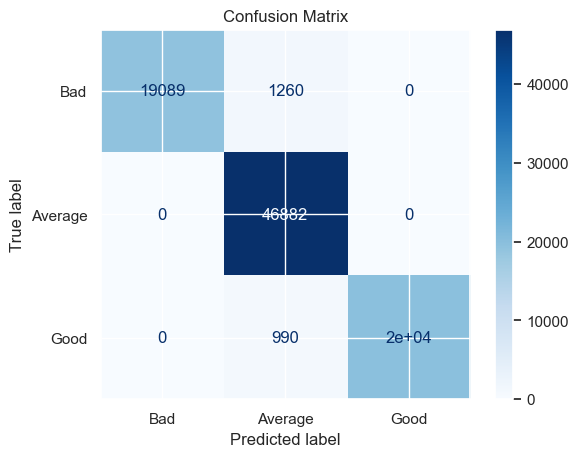

In [54]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, model.predict(X_val), labels=[0, 2, 1])  # Order: Bad (0), Average (2), Good (1)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bad', 'Average', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Insights
#### Diagonal Elements (Correct Predictions):<br>
1) Bad: The model correctly predicted 19,089 samples as "Bad."<br>
2) Average: The model correctly predicted 46,882 samples as "Average."<br>
3) Good: The model correctly predicted 20,000 samples as "Good."<br>

#### Off-Diagonal Elements (Misclassifications):<br>
1) 1,260 "Bad" samples were incorrectly classified as "Average."<br>
2) 990 "Good" samples were incorrectly classified as "Average."<br>
3) No "Bad" samples were misclassified as "Good," and no "Good" or "Average" samples were misclassified as "Bad."<br>

#### Class Imbalance:<br>
The counts indicate a potential class imbalance, with "Average" having the highest number of samples, followed by "Good" and then "Bad."<br>

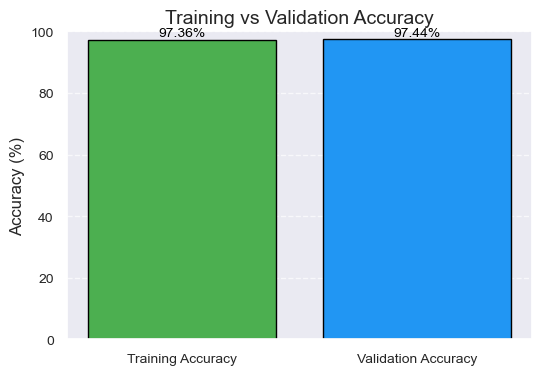

In [53]:
colors = ['#4CAF50', '#2196F3']  # Green for training, Blue for validation

# Plotting the bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Validation Accuracy'], 
        [train_accuracy, val_accuracy], 
        color=colors, edgecolor='black')
plt.title("Training vs Validation Accuracy", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)  # Ensures the y-axis scale is from 0 to 100
for index, value in enumerate([train_accuracy, val_accuracy]):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10, color='black')  # Labels with better visibility
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a subtle grid for better readability
plt.show()

### RandomForest Without Revenue Column as Input Feature and RevenueQuality as Target

In [7]:
data_RF = data_RF.drop(columns=['Revenue']) 
data_RF.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,RevenueQuality
0,0,3210,3598,6,2.55,36,2010,1,2,1,8,1
1,0,2571,3606,6,3.39,36,2010,1,2,1,8,1
2,0,2786,814,8,2.75,36,2010,1,2,1,8,1
3,0,2735,1733,6,3.39,36,2010,1,2,1,8,1
4,0,2734,2665,6,3.39,36,2010,1,2,1,8,1


In [8]:
X = data_RF.drop(columns=['RevenueQuality'])  # Input features
y = data_RF['RevenueQuality']  # Target variable

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X,
                                                  y, 
                                                  test_size = 0.2, 
                                                  random_state=42)
print(X_train.shape, X_val.shape)

(351848, 11) (87962, 11)


In [10]:
print(Y_train.shape, Y_val.shape)

(351848,) (87962,)


In [11]:
model = RandomForestClassifier(max_depth=2, 
                               random_state=22)
model.fit(X_train, Y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(Y_train, 
                             model.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_val, 
                             model.predict(X_val))*100)

Training Accuracy :  53.89202155476228
Validation Accuracy :  53.92783247311339


In [12]:
model = RandomForestClassifier(
    max_depth=2, n_estimators=30,
    min_samples_split=3, max_leaf_nodes=5,
    random_state=22)
 
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, max_leaf_nodes=5, min_samples_split=3,
                       n_estimators=30, random_state=22)

In [13]:
# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [14]:
# Calculate accuracy
train_accuracy = accuracy_score(Y_train, train_preds) * 100
val_accuracy = accuracy_score(Y_val, val_preds) * 100

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Accuracy:  61.915088333598604
Validation Accuracy:  61.95970987471863


In [16]:
model = RandomForestClassifier(n_estimators=30, 
                               random_state=22)
model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=30, random_state=22)

In [17]:
# Predict on training and validation sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

In [18]:
# Calculate accuracy
train_accuracy = accuracy_score(Y_train, train_preds) * 100
val_accuracy = accuracy_score(Y_val, val_preds) * 100

print("Training Accuracy: ", train_accuracy)
print("Validation Accuracy: ", val_accuracy)

Training Accuracy:  100.0
Validation Accuracy:  99.96703121802597


### Insights
This Model has the Highest Accuracy

In [19]:
# Classification Report
print("\nClassification Report (Validation Data):")
report = classification_report(Y_val, val_preds, target_names=['Bad', 'Average', 'Good'])
print(report)


Classification Report (Validation Data):
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00     20349
     Average       1.00      1.00      1.00     20731
        Good       1.00      1.00      1.00     46882

    accuracy                           1.00     87962
   macro avg       1.00      1.00      1.00     87962
weighted avg       1.00      1.00      1.00     87962



### Insights
1) High Precision and Recall: The Random Forest model achieved perfect precision, recall, and F1-scores (1.00) across all classes, indicating that it consistently made accurate predictions without misclassifications.<br>

2) Balanced Class Performance: All three classes—Bad, Average, and Good—were classified with equal accuracy, showcasing the model's robustness in handling class differences.<br>

3) Large Support Counts: The model performed equally well across a substantial number of samples for each class, with support counts ranging from 20,349 (Bad) to 46,882 (Good), indicating its scalability to diverse datasets.<br>

4) Macro and Weighted Averages: The macro and weighted averages for precision, recall, and F1-scores were all 1.00, confirming the model's ability to handle imbalanced class distributions effectively.<br>

5) Business Value: This classification accuracy ensures high confidence in automating decision-making tasks, such as categorizing revenue quality, minimizing manual intervention, and reducing potential errors in critical business processes.<br>

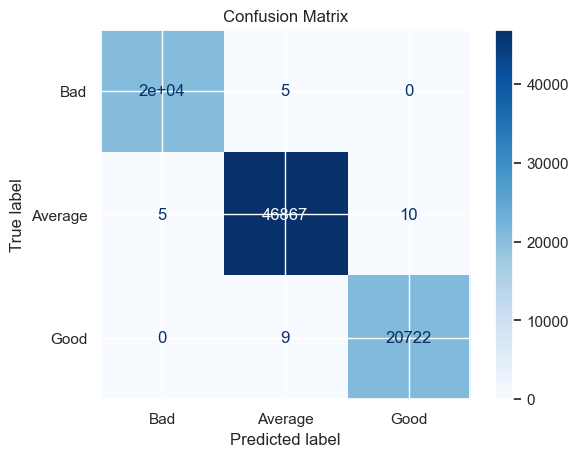

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_val, model.predict(X_val), labels=[0, 2, 1])  # Order: Bad (0), Average (2), Good (1)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bad', 'Average', 'Good'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Insights
### Diagonal Elements (Correct Predictions):
1) Bad: The model correctly predicted 20000 samples as "Bad."
2) Average: The model correctly predicted 46867 samples as "Average."
3) Good: The model correctly predicted 20722 samples as "Good."

### Off-Diagonal Elements (Misclassifications):
1) 5 "Bad" samples were incorrectly classified as "Average."
2) 9 "Good" samples were incorrectly classified as "Average."
3) 5 "Average" samples were incorrectly classified as "Bad."
4) 10 "Average" samples were incorrectly classified as "Good."
5) No "Bad" samples were misclassified as "Good," and no "Good" samples were misclassified as "Bad."


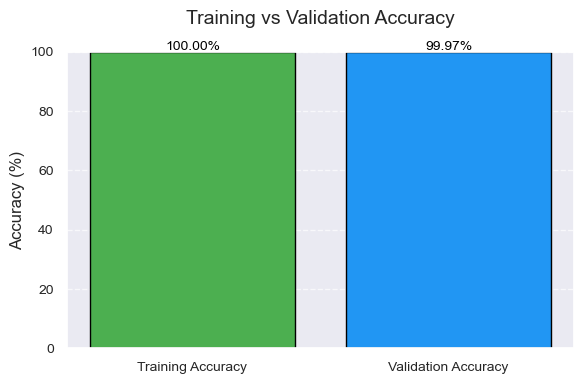

In [24]:
colors = ['#4CAF50', '#2196F3']  # Green for training, Blue for validation


# Plotting the bar plot
plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
plt.bar(['Training Accuracy', 'Validation Accuracy'], 
        [train_accuracy, val_accuracy], 
        color=colors, edgecolor='black')

# Add title and labels
plt.title("Training vs Validation Accuracy", fontsize=14, pad=20)  # Added padding for better spacing
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 100)  # Ensures the y-axis scale is from 0 to 100

# Add percentage labels above bars
for index, value in enumerate([train_accuracy, val_accuracy]):
    plt.text(index, value + 0.5,  # Adjust the position slightly above the bar
             f"{value:.2f}%", 
             ha='center', fontsize=10, color='black')

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adds a subtle grid for better readability

# Show plot
plt.tight_layout()  # Ensures all elements fit within the figure area
plt.show()


### SVM

In [7]:
inputs = data_RF.drop(columns=['RevenueQuality'])  # Input features
target = data_RF['RevenueQuality']  # Target variable

In [8]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42, stratify = target)

In [9]:
x_train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Year,Month,Week,DayOfWeek,Hour,Revenue
317952,13324,1024,45,1,4.13,36,2011,12,49,5,16,4.13
12036,516,479,1361,3,1.66,36,2010,7,28,0,15,4.98
128166,5299,2517,2246,6,4.95,36,2011,4,16,0,12,29.70
86733,3438,424,2173,1,0.55,36,2011,3,9,3,15,0.55
17643,723,1502,3636,2,1.95,36,2010,9,36,6,19,3.90


In [10]:
#check the result of the stratification
pd.Series(y_train).value_counts()

2    187317
1     83464
0     81067
Name: RevenueQuality, dtype: int64

In [11]:
target.value_counts()

2    234146
1    104330
0    101334
Name: RevenueQuality, dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [14]:
svc = svm.SVC(kernel='linear' )
svc.fit(x_train_scaled, y_train) #train the svm

SVC(kernel='linear')

In [19]:
# Predict on the training set
train_preds = svc.predict(x_train_scaled)



In [20]:
# Predict on the validation (test) set
val_preds = svc.predict(x_test_scaled)

In [21]:
# Calculate Training Accuracy
train_accuracy = accuracy_score(y_train, train_preds) * 100

# Calculate Validation Accuracy
val_accuracy = accuracy_score(y_test, val_preds) * 100

In [22]:
# Print the accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 99.96561014983743
Validation Accuracy: 99.96475750892431


In [23]:
# Predictions on validation set
y_pred = svc.predict(x_test_scaled)

# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20267
           1       1.00      1.00      1.00     20866
           2       1.00      1.00      1.00     46829

    accuracy                           1.00     87962
   macro avg       1.00      1.00      1.00     87962
weighted avg       1.00      1.00      1.00     87962

